In [5]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yf

In [6]:
#yahoo api broken so fix for now
yf.pdr_override()
#fetch data
df = pdr.get_data_yahoo('AAPL',start='2013-01-01',end='2023-1-31')

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02 00:00:00-05:00,19.779285,19.821428,19.343929,19.608213,16.837118,560518000
2013-01-03 00:00:00-05:00,19.567142,19.631071,19.321428,19.360714,16.624594,352965200
2013-01-04 00:00:00-05:00,19.177500,19.236786,18.779642,18.821428,16.161530,594333600
2013-01-07 00:00:00-05:00,18.642857,18.903570,18.400000,18.710714,16.066458,484156400
2013-01-08 00:00:00-05:00,18.900356,18.996071,18.616072,18.761070,16.109692,458707200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2537 entries, 2013-01-02 00:00:00-05:00 to 2023-01-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2537 non-null   float64
 1   High       2537 non-null   float64
 2   Low        2537 non-null   float64
 3   Close      2537 non-null   float64
 4   Adj Close  2537 non-null   float64
 5   Volume     2537 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.7 KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2.537000e+03
mean,62.925182,63.640481,62.232818,62.962667,61.103131,1.706136e+08
std,48.902328,49.550125,48.270039,48.935687,49.412388,1.248771e+08
min,13.856071,14.271429,13.753571,13.947500,12.046193,3.519590e+07
25%,27.055000,27.242500,26.790001,27.007500,24.687176,9.118300e+07
50%,41.707500,42.244999,41.235001,41.722500,39.824680,1.298688e+08
75%,96.692497,97.404999,95.839996,96.522499,94.897041,2.040924e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,1.460852e+09


In [7]:
#if needed to convert the data frame's date time to proper format
#df.Date = pd.to_datetime(df.Date)
#df2 = df.set_index('Date') #this is the new dataframe after formatting

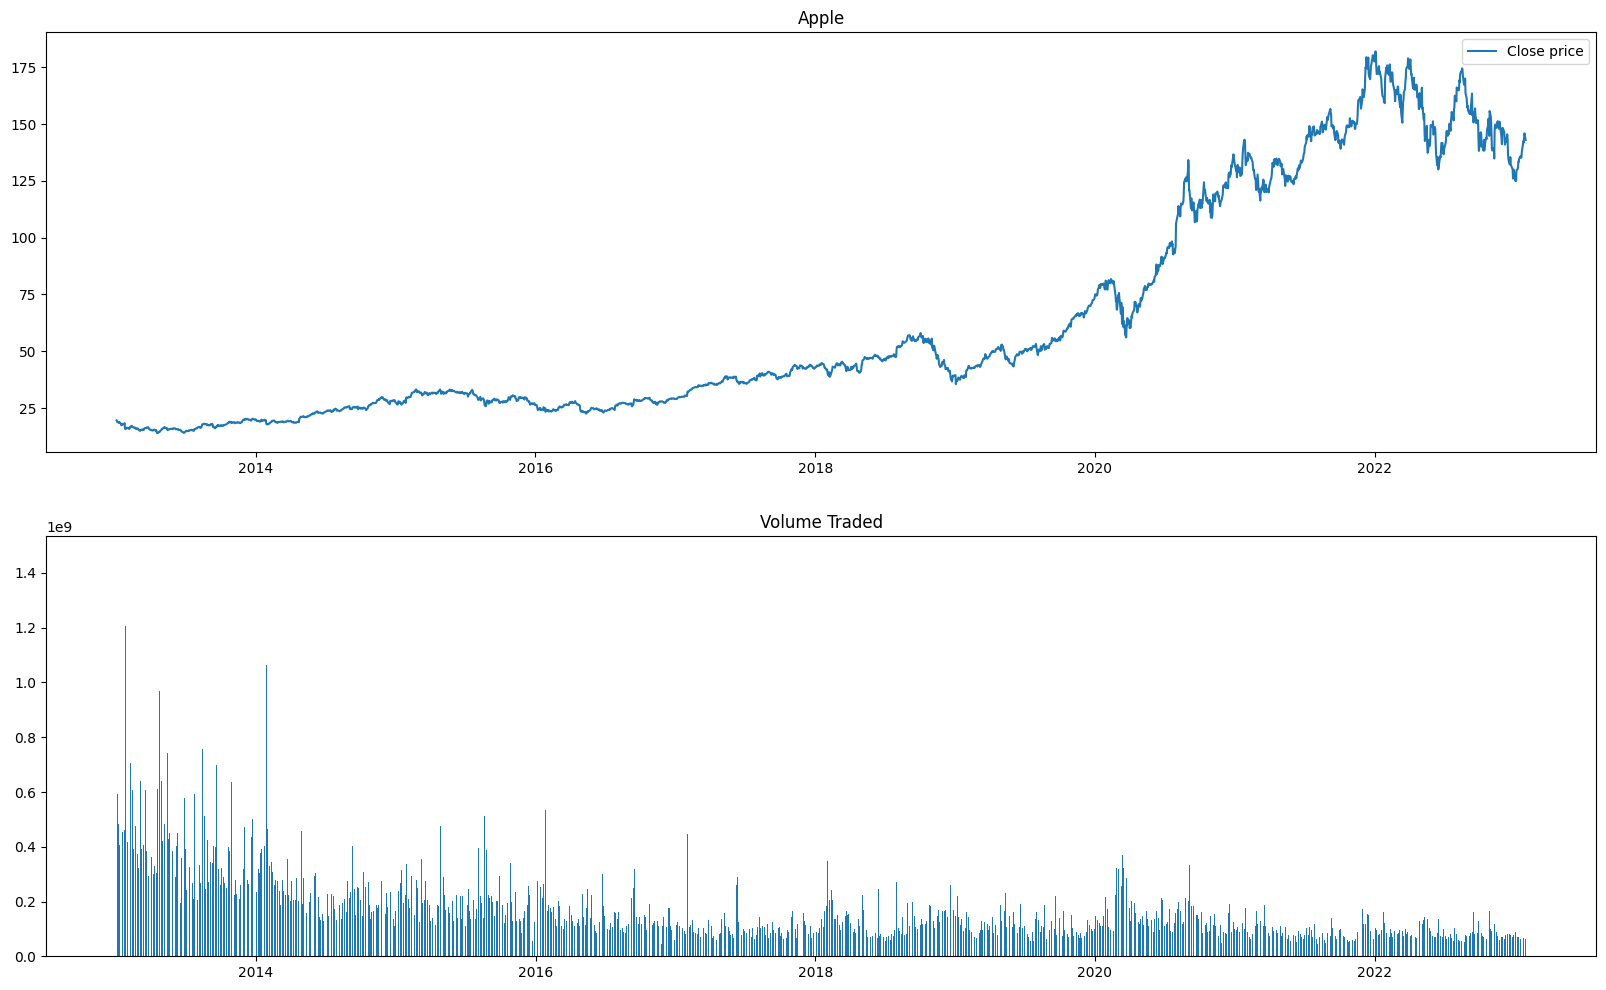

In [8]:
#plot the data frame
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('Apple')
plt.plot(df.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df.index,height=df['Volume'])
plt.show()

In [9]:
#ARIMA MODEL

In [10]:
data = list(df["Close"])

In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.2067002609689319
2. P-Value :  0.9377182373837192
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 2514
5. Critical Values :
	 1% :  -3.4329538144697187
	 5% :  -2.8626903542179405
	 10% :  -2.567382377622466


In [12]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [14]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

2437 100


In [15]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9591.061, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9593.734, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9588.017, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9587.535, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9594.070, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9587.128, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9590.758, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9588.915, Time=0.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9587.404, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9587.824, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=9588.003, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.266 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2

In [16]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(5,2,0))

In [17]:
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2537
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -4981.511
Date:                Sun, 19 Feb 2023   AIC                           9975.021
Time:                        21:46:18   BIC                          10010.049
Sample:                             0   HQIC                          9987.729
                               - 2537                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8908      0.010    -85.228      0.000      -0.911      -0.870
ar.L2         -0.7356      0.014    -53.849      0.000      -0.762      -0.709
ar.L3         -0.5732      0.014    -41.082      0.000      -0.601      -0.546
ar.L4         -0.3854      0.013    -29.501      0.000      -0.411      -0.360
ar.L5         -0.1464      0.011    -13.302      0.000      -0.168      -0.125
sigma2         2.9798      0.035     85.337      0.000       2.911       3.048
===================================================================================
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):             11174.27
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):              45.62   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([152.94119092, 154.94181283, 153.83579319, 157.04133528,
       163.94748916, 154.07857409, 155.36427451, 152.33346171,
       150.37307781, 153.02746191, 155.87462526, 153.5612442 ,
       152.41321327, 150.62259712, 150.82385689, 150.95584758,
       148.70557929, 140.90766997, 136.2078139 , 140.98005216,
       144.76634648, 144.84557556, 144.66157678, 140.47989613,
       141.02064672, 138.43038297, 136.90932496, 141.80832116,
       137.52089902, 142.47397148, 144.28250032, 144.8861834 ,
       143.90945134, 148.17847977, 151.14458111, 153.75822938,
       150.45871327, 145.57663887, 157.3745641 , 154.48457232,
       150.61482495, 144.13904011, 138.39704491, 136.98091692,
       135.8525225 , 136.6738317 , 132.15583955, 146.6375703 ,
       151.2837286 , 149.86131445, 151.70402215, 151.41747804,
       153.18894117, 151.85419744, 148.03175722, 150.32200549,
       151.35640727, 148.08006056, 143.18776093, 139.95815915,
       147.64818651, 147.60181759, 146.97732121, 146.45

In [19]:
s = pd.Series(pred, index =df.index[-100:])
s

Date
2022-09-07 00:00:00-04:00    152.941191
2022-09-08 00:00:00-04:00    154.941813
2022-09-09 00:00:00-04:00    153.835793
2022-09-12 00:00:00-04:00    157.041335
2022-09-13 00:00:00-04:00    163.947489
                                ...    
2023-01-24 00:00:00-05:00    142.219438
2023-01-25 00:00:00-05:00    143.619687
2023-01-26 00:00:00-05:00    142.929345
2023-01-27 00:00:00-05:00    145.554711
2023-01-30 00:00:00-05:00    147.783745
Length: 100, dtype: float64

<AxesSubplot: xlabel='Date'>

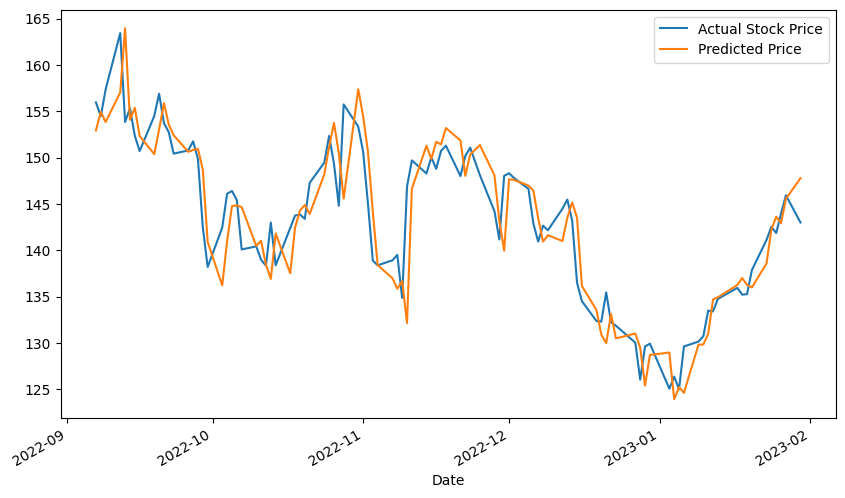

In [20]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

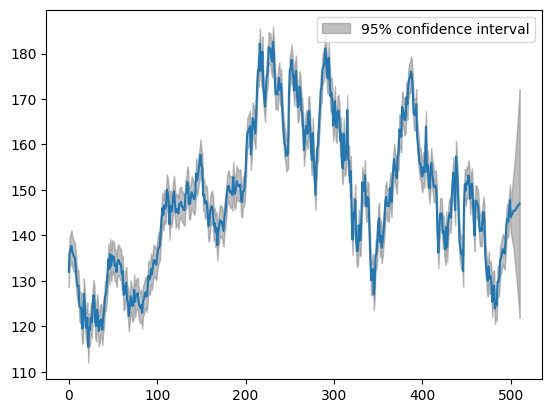

In [21]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [22]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

3.6582807211184964

In [23]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.8028992835101499

In [24]:
#Predicting future 10 values

In [25]:
pred_future = model.predict(start=end,end=end+10)
pred_future

array([147.78374521, 144.01471526, 144.43308333, 144.93408553,
       145.4463737 , 145.42679663, 145.47768364, 145.90605292,
       146.23474145, 146.53745564, 146.77096794])

In [26]:
import datetime
start_date = datetime.datetime(2023,2,1)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(11)]

In [27]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2023-02-01    147.783745
2023-02-02    144.014715
2023-02-03    144.433083
2023-02-04    144.934086
2023-02-05    145.446374
2023-02-06    145.426797
2023-02-07    145.477684
2023-02-08    145.906053
2023-02-09    146.234741
2023-02-10    146.537456
2023-02-11    146.770968
dtype: float64

<AxesSubplot: xlabel='Date'>

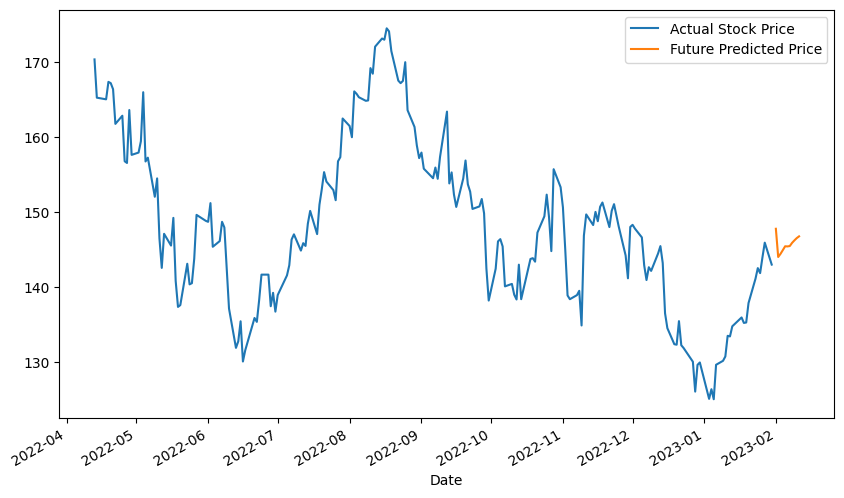

In [28]:
plt.figure(figsize=(10,6), dpi=100)
df['Close'][-200:].plot(label='Actual Stock Price', legend=True)
pred_future2.plot(label='Future Predicted Price', legend=True)

In [29]:
#COMPARE WITH REAL VALUES

In [30]:
check_df = pdr.get_data_yahoo('AAPL',start='2023-02-1',end='2023-2-11')

[*********************100%***********************]  1 of 1 completed


In [32]:
check_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-01 00:00:00-05:00,143.970001,146.610001,141.320007,145.429993,145.208282,77663600
2023-02-02 00:00:00-05:00,148.899994,151.179993,148.169998,150.820007,150.590088,118339000
2023-02-03 00:00:00-05:00,148.029999,157.380005,147.830002,154.500000,154.264465,154279900
2023-02-06 00:00:00-05:00,152.570007,153.100006,150.779999,151.729996,151.498688,69858300
2023-02-07 00:00:00-05:00,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08 00:00:00-05:00,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09 00:00:00-05:00,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10 00:00:00-05:00,149.460007,151.339996,149.220001,151.009995,151.009995,57409100


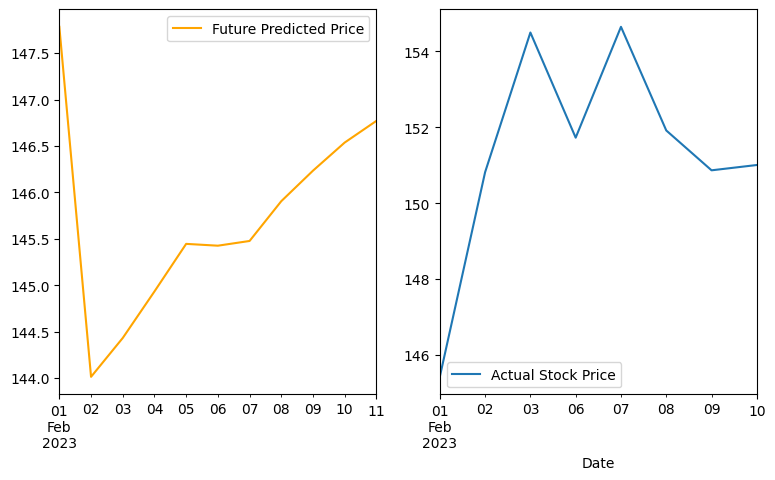

In [33]:
plt.figure(figsize=(9,5), dpi=100)
plt.subplot(1, 2, 1)
pred_future2.plot(label='Future Predicted Price', legend=True, color='orange')
plt.subplot(1, 2, 2)
check_df['Close'].plot(label='Actual Stock Price', legend=True)
plt.show()